##### Insurance Claims- Fraud Detection - Vinayak Ratan

##### Problem Statement:
##### Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

Note: Use the link below to reach to your dataset. 


Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
auto_insurance_df = pd.read_csv(r'G:\AI Professional\Data Trained\Notes\Github docs\Datasets\Data-Science-ML-Capstone-Projects-master\Automobile_insurance_fraud.csv')
auto_insurance_df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
auto_insurance_df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [4]:
auto_insurance_df.shape

(1000, 40)

In [5]:
auto_insurance_df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [6]:
auto_insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
auto_insurance_df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
auto_insurance_df.drop('_c39', axis = 1, inplace = True )

In [9]:
auto_insurance_df.isnull().sum().sum()

0

In [10]:
auto_insurance_df['Policy Month'] = pd.DatetimeIndex(auto_insurance_df['policy_bind_date']).month
auto_insurance_df['Policy Date'] = pd.DatetimeIndex(auto_insurance_df['policy_bind_date']).day
auto_insurance_df['Policy Year'] = pd.DatetimeIndex(auto_insurance_df['policy_bind_date']).year

In [11]:
# Separating the object and numerical datatypes for plotting purpose
obj = auto_insurance_df.select_dtypes(include=['object']).columns
num = auto_insurance_df.select_dtypes(include = ['int32','int64','float32','float64']).columns

In [12]:
obj

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

In [13]:
num

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'Policy Month', 'Policy Date', 'Policy Year'],
      dtype='object')

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
Count Plot of policy_state


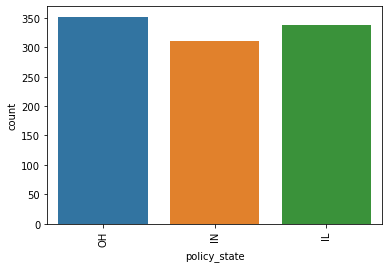

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
Count Plot of policy_csl


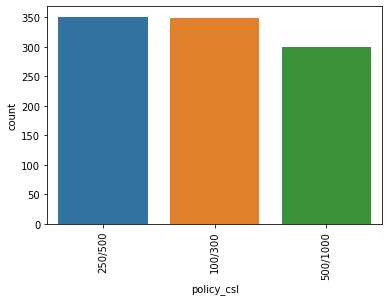

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
Count Plot of insured_sex


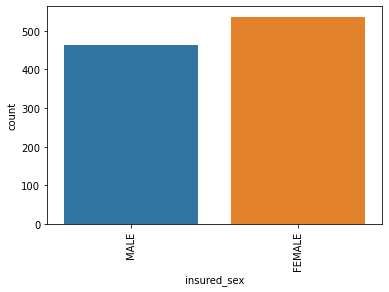

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
Count Plot of insured_education_level


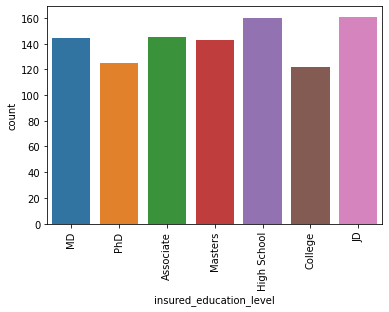

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
Count Plot of insured_occupation


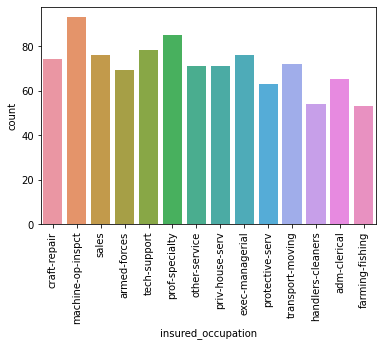

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64
Count Plot of insured_hobbies


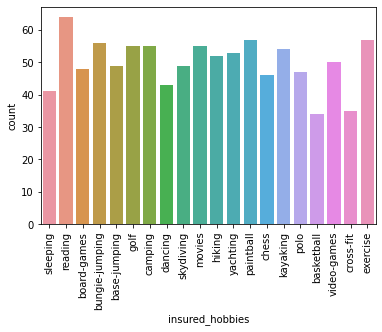

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64
Count Plot of insured_relationship


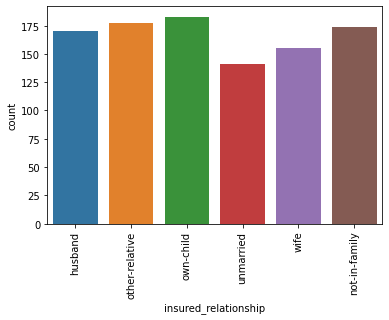

02-02-2015    28
17-02-2015    26
07-01-2015    25
10-01-2015    24
04-02-2015    24
24-01-2015    24
19-01-2015    23
08-01-2015    22
13-01-2015    21
30-01-2015    21
12-02-2015    20
22-02-2015    20
31-01-2015    20
06-02-2015    20
21-02-2015    19
01-01-2015    19
23-02-2015    19
12-01-2015    19
14-01-2015    19
21-01-2015    19
03-01-2015    18
14-02-2015    18
01-02-2015    18
28-02-2015    18
20-01-2015    18
18-01-2015    18
25-02-2015    18
06-01-2015    17
09-01-2015    17
08-02-2015    17
24-02-2015    17
26-02-2015    17
13-02-2015    16
15-02-2015    16
16-02-2015    16
05-02-2015    16
16-01-2015    16
17-01-2015    15
18-02-2015    15
28-01-2015    15
15-01-2015    15
22-01-2015    14
20-02-2015    14
27-02-2015    14
23-01-2015    13
03-02-2015    13
27-01-2015    13
09-02-2015    13
04-01-2015    12
01-03-2015    12
26-01-2015    11
29-01-2015    11
02-01-2015    11
19-02-2015    10
11-02-2015    10
10-02-2015    10
07-02-2015    10
25-01-2015    10
11-01-2015    

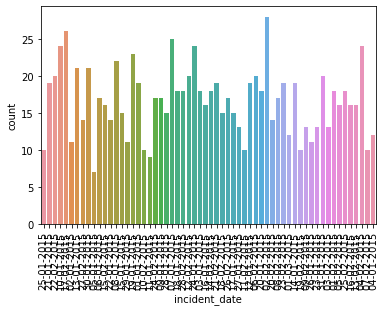

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64
Count Plot of incident_type


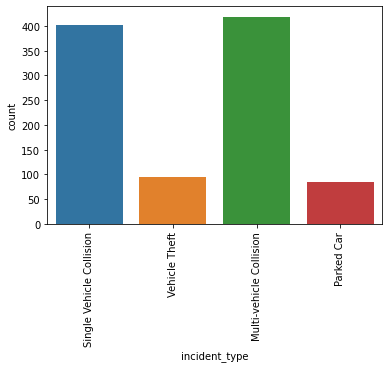

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64
Count Plot of collision_type


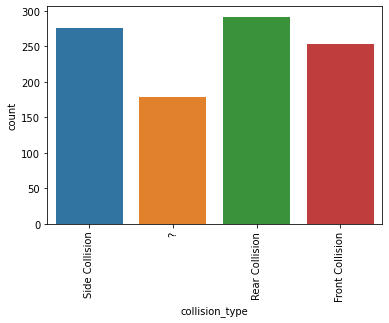

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64
Count Plot of incident_severity


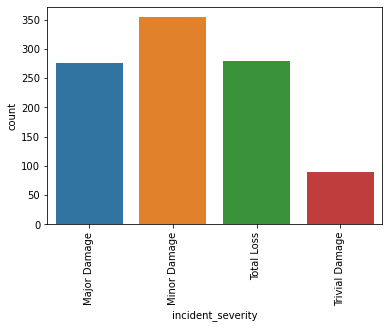

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64
Count Plot of authorities_contacted


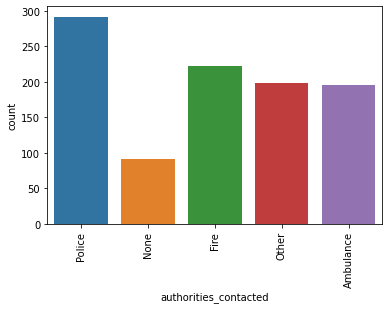

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64
Count Plot of incident_state


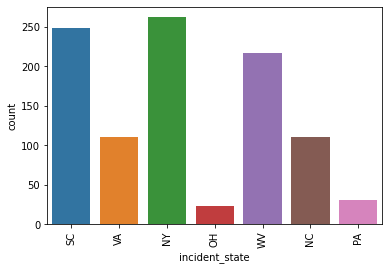

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64
Count Plot of incident_city


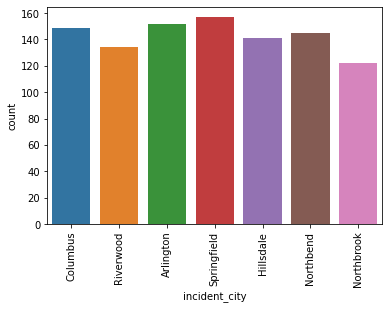

9935 4th Drive         1
4214 MLK Ridge         1
8548 Cherokee Ridge    1
2352 MLK Drive         1
9734 2nd Ridge         1
                      ..
6770 1st St            1
4119 Texas St          1
4347 2nd Ridge         1
1091 1st Drive         1
1416 Cherokee Ridge    1
Name: incident_location, Length: 1000, dtype: int64
Count Plot of incident_location


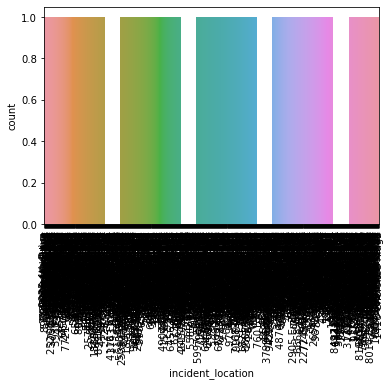

?      360
NO     338
YES    302
Name: property_damage, dtype: int64
Count Plot of property_damage


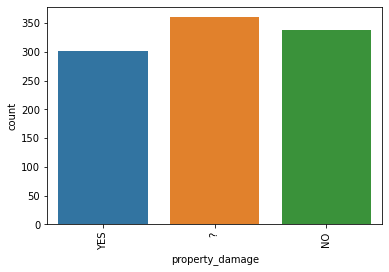

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64
Count Plot of police_report_available


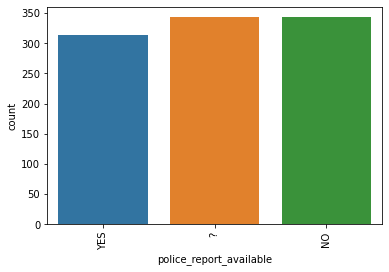

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64
Count Plot of auto_make


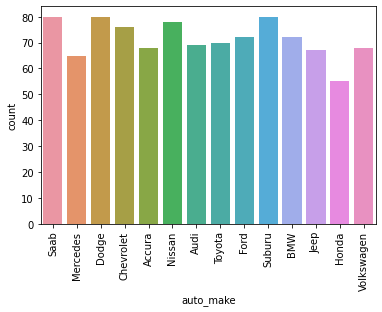

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64
Count Plot of auto_model


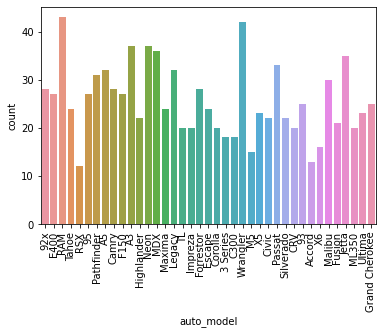

N    753
Y    247
Name: fraud_reported, dtype: int64
Count Plot of fraud_reported


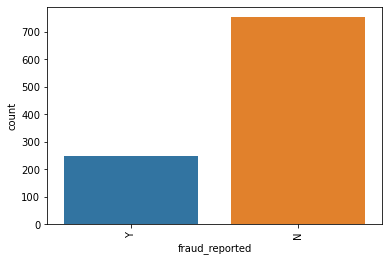

In [14]:
for i in obj[1:]:
    print(auto_insurance_df[i].value_counts())
    plt.xticks(rotation = 'vertical')
    print(f"Count Plot of {i}")
    sns.countplot(x = i, data = auto_insurance_df)
    plt.show()

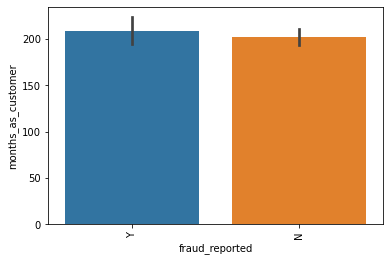

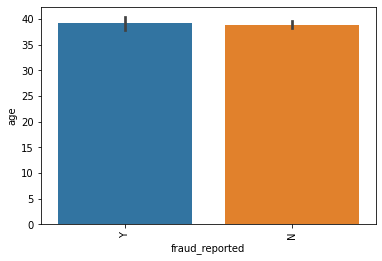

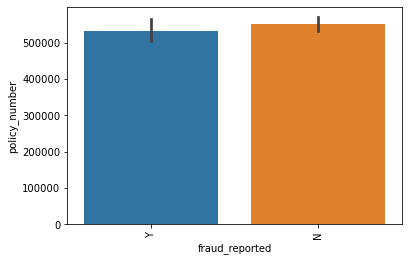

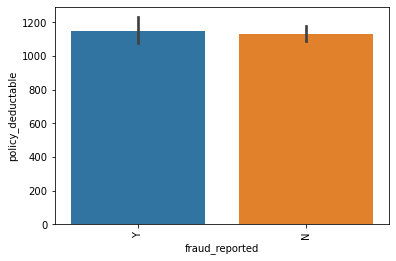

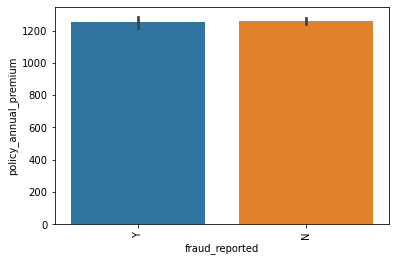

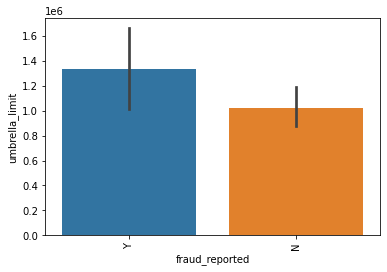

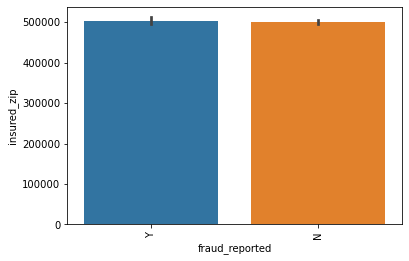

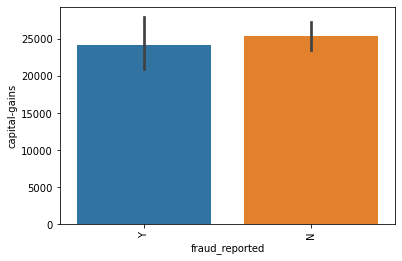

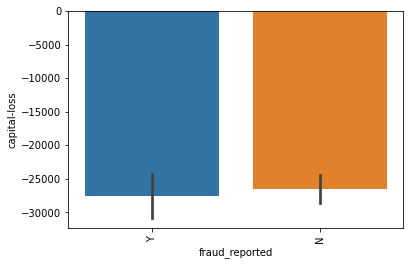

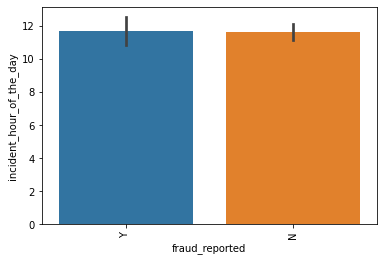

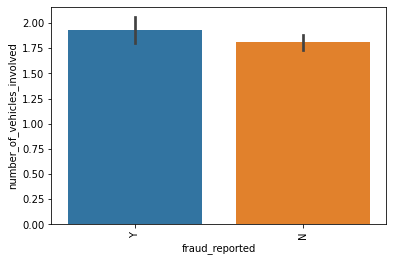

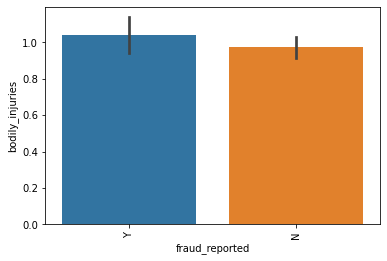

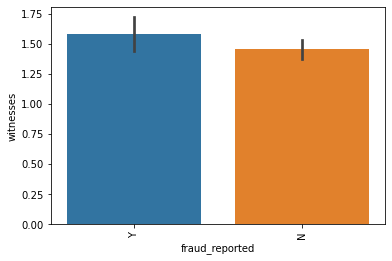

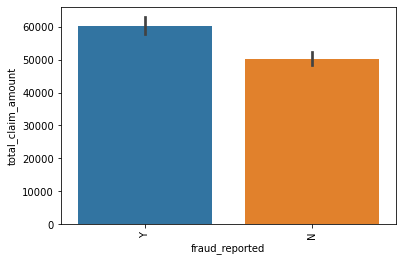

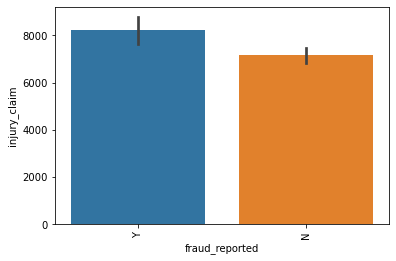

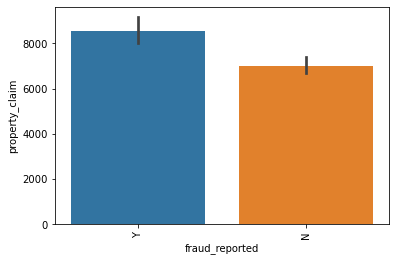

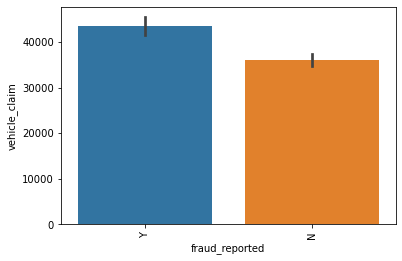

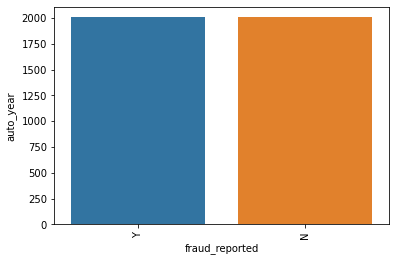

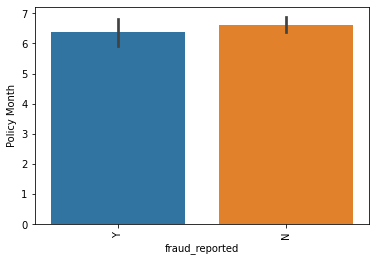

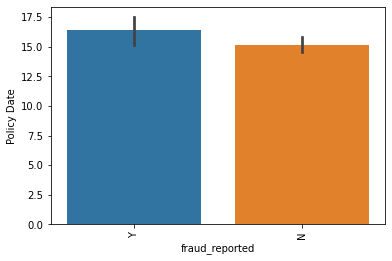

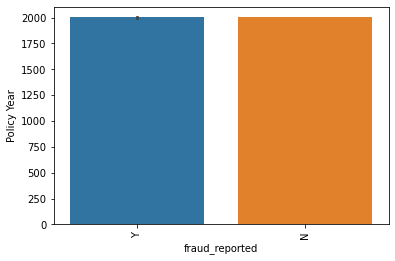

In [15]:
# Bar plot to see how each numerical is related to fraud or not
for i in num:
    plt.xticks(rotation = 'vertical')
    sns.barplot(x = 'fraud_reported', y = i, data = auto_insurance_df)
    plt.show()

- Irrespective of the feature, the distribution is equal in with respect to fraud or no

In [16]:
# We can drop incident location 
auto_insurance_df.drop('incident_location', axis = 1, inplace = True)

In [17]:
auto_insurance_df.sample()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Policy Month,Policy Date,Policy Year
345,86,28,613226,22-08-1991,IN,100/300,2000,1595.07,0,439304,...,11820,11820,47280,Jeep,Wrangler,2002,N,8,22,1991


##### Label Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
for i in auto_insurance_df.select_dtypes(include=['object']).columns:
    auto_insurance_df[i]=le.fit_transform(auto_insurance_df[i])

In [20]:
auto_insurance_df.sample()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Policy Month,Policy Date,Policy Year
730,116,31,615116,290,1,1,500,1194.83,0,603733,...,4420,8840,30940,11,15,1997,0,9,11,2008


##### Checking for Outliers

months_as_customer                AxesSubplot(0.125,0.821923;0.168478x0.0580769)
age                            AxesSubplot(0.327174,0.821923;0.168478x0.0580769)
policy_number                  AxesSubplot(0.529348,0.821923;0.168478x0.0580769)
policy_bind_date               AxesSubplot(0.731522,0.821923;0.168478x0.0580769)
policy_state                      AxesSubplot(0.125,0.752231;0.168478x0.0580769)
policy_csl                     AxesSubplot(0.327174,0.752231;0.168478x0.0580769)
policy_deductable              AxesSubplot(0.529348,0.752231;0.168478x0.0580769)
policy_annual_premium          AxesSubplot(0.731522,0.752231;0.168478x0.0580769)
umbrella_limit                    AxesSubplot(0.125,0.682538;0.168478x0.0580769)
insured_zip                    AxesSubplot(0.327174,0.682538;0.168478x0.0580769)
insured_sex                    AxesSubplot(0.529348,0.682538;0.168478x0.0580769)
insured_education_level        AxesSubplot(0.731522,0.682538;0.168478x0.0580769)
insured_occupation          

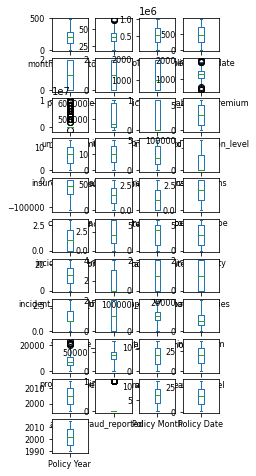

In [21]:
auto_insurance_df.plot(kind='box', subplots = True, layout = (11,4), figsize = (3,8), fontsize = 8)

In [22]:
from scipy.stats import zscore
z = np.abs(zscore(auto_insurance_df))
z

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Policy Month,Policy Date,Policy Year
0,1.078140,0.990836,0.095953,0.209500,1.187173,0.060937,0.222383,0.616705,0.479476,0.489529,...,0.189283,1.165505,0.749653,0.856466,1.645743,0.183440,1.746019,1.015026,0.175451,1.684992
1,0.208995,0.334073,0.791527,1.259397,0.016856,0.060937,1.412784,0.242521,1.697980,0.461008,...,1.363822,1.372696,1.823346,0.360539,0.657470,0.315491,1.746019,0.164894,1.305938,0.597550
2,0.608002,1.088913,0.550566,1.047470,1.187173,1.182668,1.412784,0.642233,1.697980,0.984885,...,0.054644,0.736072,0.785565,0.631315,0.959702,0.315491,0.572731,0.164894,0.728938,0.218032
3,0.452355,0.224613,1.239334,1.059589,1.220886,0.060937,1.412784,0.652886,2.133471,1.491682,...,0.224130,0.219722,0.677607,0.879279,1.319074,1.479664,1.746019,0.459874,1.079841,1.577335
4,0.208995,0.552994,0.695834,1.065634,1.220886,1.304542,0.222383,1.341980,2.133471,1.527808,...,1.257232,1.399654,1.768252,1.623169,1.049545,0.648112,0.572731,0.164894,1.068084,1.684992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.746582,0.103769,1.539740,0.046021,1.187173,1.304542,0.222383,0.222884,0.479476,0.975717,...,2.051155,0.273817,1.224309,0.135388,1.196528,0.149180,0.572731,0.130086,0.062403,1.441405
996,0.704407,0.224613,1.398429,1.254543,1.220886,1.182668,0.222383,0.739141,0.479476,1.492519,...,2.182342,2.214794,1.821868,1.600357,0.780016,1.645974,0.572731,0.459874,1.633327,1.684992
997,0.642767,0.541611,1.448920,0.125944,1.187173,0.060937,1.039966,0.520739,0.826998,0.815138,...,0.013648,0.020826,0.771902,1.104430,0.028570,1.513924,0.572731,1.344813,0.175451,0.189759
998,2.208028,2.523284,0.047867,0.358447,1.220886,1.304542,1.412784,0.411866,1.697980,0.830250,...,0.453708,0.451976,0.073580,1.375206,1.286371,1.181303,0.572731,1.310006,0.288500,1.277201


In [23]:
# List of array containing z-score greater than 3
np.where(z>3)

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
        657, 700, 763, 807, 875, 922, 975], dtype=int64),
 array([ 8,  8,  8,  8,  8,  7,  7,  8,  8,  8,  8, 32,  8,  8,  8,  7, 16,
         8,  8,  8], dtype=int64))

In [24]:
z.shape

(1000, 41)

In [25]:
# Removing the rows with z score greater than 3
auto_insurance_df_new = auto_insurance_df[(z<3).all(axis=1)]
auto_insurance_df_new

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Policy Month,Policy Date,Policy Year
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,6510,13020,52080,10,1,2004,1,10,17,2014
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,780,780,3510,8,12,2007,1,6,27,2006
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,7700,3850,23100,4,30,2007,0,6,9,2000
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,6340,6340,50720,3,34,2014,1,5,25,1990
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1300,650,4550,0,31,2009,0,6,6,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,0,431289,...,17440,8720,61040,6,6,2006,0,7,16,1991
996,285,41,186934,129,0,0,1000,1436.79,0,608177,...,18080,18080,72320,13,28,2015,0,5,1,2014
997,130,34,918516,509,2,1,500,1383.49,3000000,442797,...,7500,7500,52500,11,19,1996,0,2,17,2003
998,458,62,533940,573,0,2,2000,1356.92,5000000,441714,...,5220,5220,36540,1,5,1998,0,11,18,2011


In [26]:
# Checking the shape of the dataset before and after removing outliers
print("Old DataFrame:-", auto_insurance_df.shape)
print("New DataFrame:-", auto_insurance_df_new.shape)
print('Total dropped rows:-', auto_insurance_df.shape[0]-auto_insurance_df_new.shape[0])

Old DataFrame:- (1000, 41)
New DataFrame:- (980, 41)
Total dropped rows:- 20


In [27]:
# Percentage loss of data
loss_percent = (1000 - 980)/980*100
print(loss_percent,'%')

2.0408163265306123 %


- After removing the outliers only 2% of the data will lost, which is acceptable

##### Correlation

In [28]:
auto_insurance_df_new.corr()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Policy Month,Policy Date,Policy Year
months_as_customer,1.000000,0.922960,0.061267,0.055337,-0.007183,-0.021855,0.031041,-0.003814,0.018213,0.029572,...,0.065062,0.036660,0.055941,0.049734,0.005130,0.000869,0.021285,0.004207,0.050824,-0.041914
age,0.922960,1.000000,0.062332,0.057015,-0.020012,-0.013323,0.032036,0.005330,0.013256,0.035864,...,0.077149,0.062375,0.058918,0.033757,0.015322,0.005594,0.013279,0.014492,0.053147,-0.031709
policy_number,0.061267,0.062332,1.000000,0.054617,0.071343,0.042129,-0.009812,0.028686,-0.000145,0.004531,...,-0.006386,-0.011147,-0.018152,0.016494,0.064599,-0.005574,-0.036887,0.001913,0.052670,-0.041632
policy_bind_date,0.055337,0.057015,0.054617,1.000000,0.015488,0.003408,0.001466,-0.041670,-0.020458,-0.044430,...,0.012931,0.000816,0.004359,-0.020202,0.004594,0.033187,0.061472,0.213959,0.941767,0.007813
policy_state,-0.007183,-0.020012,0.071343,0.015488,1.000000,0.001653,0.017612,0.015089,-0.010921,0.020669,...,-0.048188,-0.006420,-0.006411,0.010259,-0.018008,-0.001160,0.034587,0.073692,-0.000583,-0.003045
policy_csl,-0.021855,-0.013323,0.042129,0.003408,0.001653,1.000000,0.009912,0.032654,0.013504,0.005593,...,-0.080098,-0.042876,-0.043987,-0.009395,0.042905,-0.030370,-0.032509,-0.041283,0.013568,-0.019409
policy_deductable,0.031041,0.032036,-0.009812,0.001466,0.017612,0.009912,1.000000,-0.008300,0.013471,-0.004399,...,0.038459,0.071031,0.005279,-0.028032,-0.002591,0.030569,0.015774,-0.054208,0.013395,-0.054041
policy_annual_premium,-0.003814,0.005330,0.028686,-0.041670,0.015089,0.032654,-0.008300,1.000000,-0.014107,0.047651,...,-0.024119,-0.014073,0.009521,0.009311,-0.038226,-0.042446,-0.012686,-0.031608,-0.032681,0.002433
umbrella_limit,0.018213,0.013256,-0.000145,-0.020458,-0.010921,0.013504,0.013471,-0.014107,1.000000,0.004481,...,-0.046298,-0.021380,-0.048740,0.012857,0.015360,0.027952,0.044729,-0.001072,-0.030416,0.049032
insured_zip,0.029572,0.035864,0.004531,-0.044430,0.020669,0.005593,-0.004399,0.047651,0.004481,1.000000,...,-0.019463,-0.007904,-0.042364,-0.020518,0.021858,-0.041291,0.009699,0.013186,-0.038856,-0.003239


<AxesSubplot:>

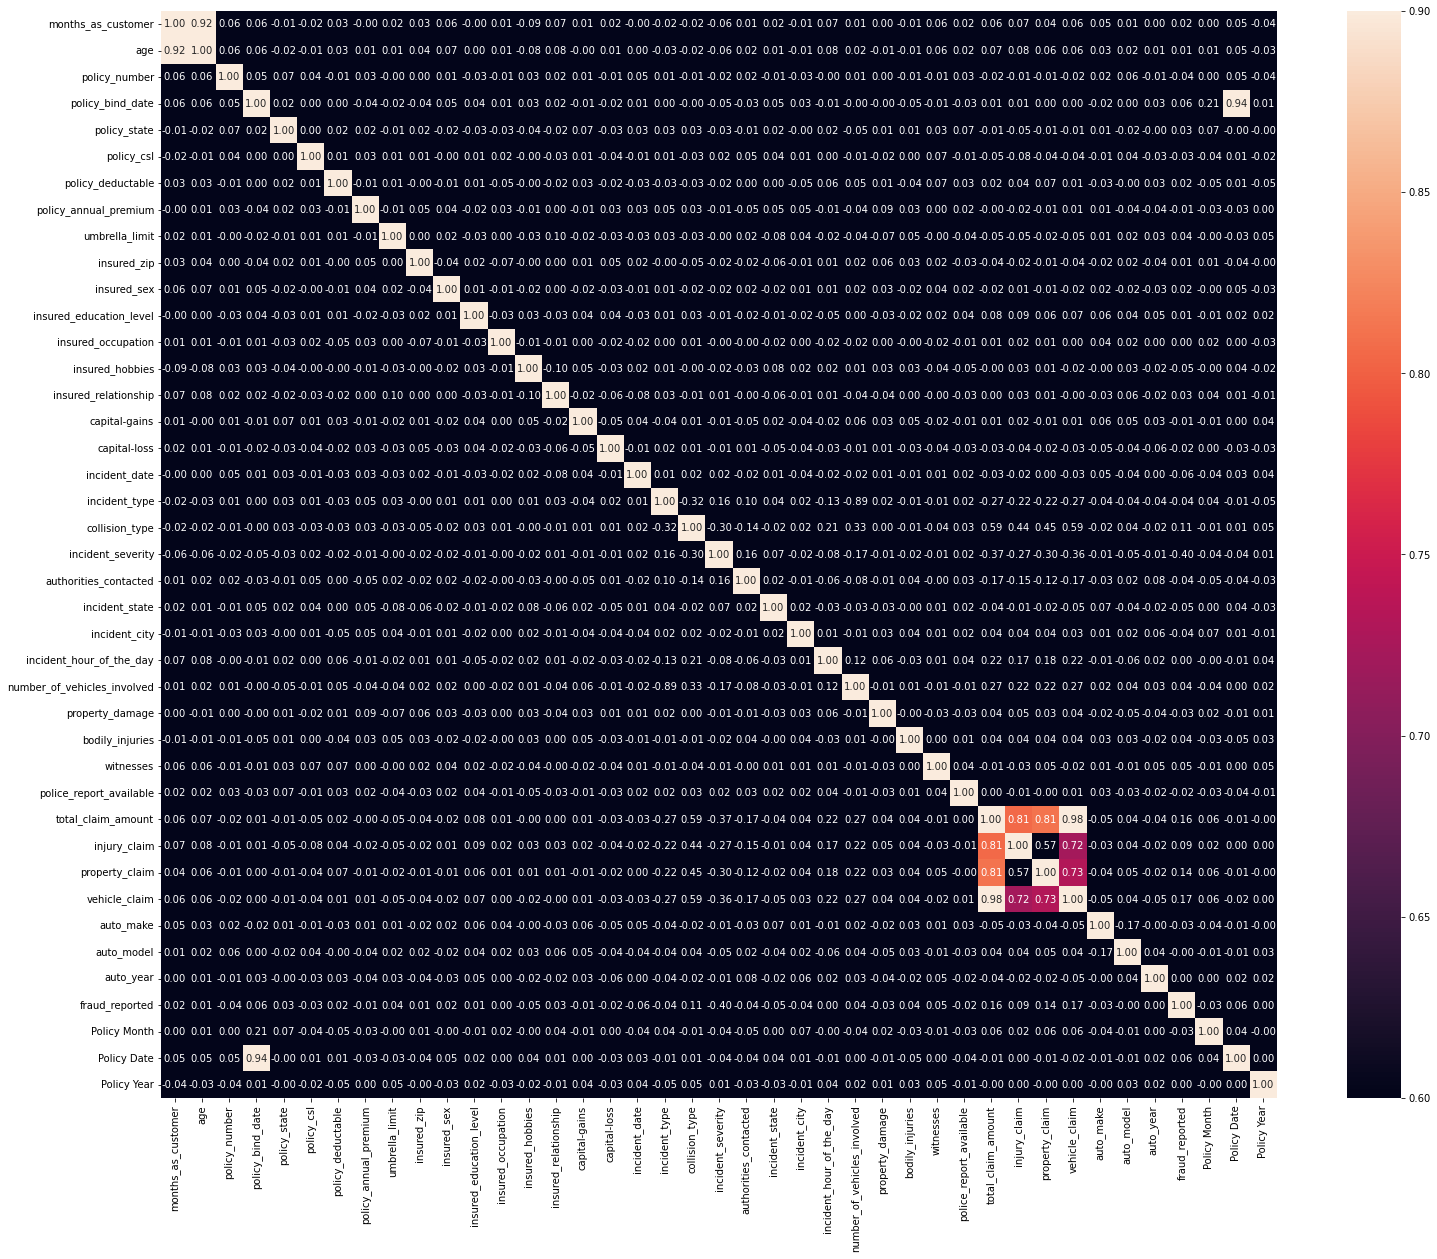

In [29]:
plt.figure(figsize = (25,20))
sns.heatmap(auto_insurance_df_new.corr(), annot = True, fmt ="0.2f", vmin = 0.6, vmax = 0.9)

- There are few features which are highly correalted with each other, showing the presence of multicollinearity

##### Splitting the data into X and Y

In [30]:
X = auto_insurance_df_new.drop('fraud_reported', axis = 1)
y = auto_insurance_df_new['fraud_reported']

In [31]:
X.shape, y.shape

((980, 40), (980,))

##### Checking for skewness

In [32]:
X.skew()

months_as_customer             0.362608
age                            0.475385
policy_number                  0.036283
policy_bind_date               0.006386
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_zip                    0.837283
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_date                  0.002604
incident_type                  0.090563
collision_type                -0.194015
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_hour_of_the_day      -0.039280


In [33]:
# # Lets remove the skewness using transformation
# for index in X.skew().index:
#     if X.skew().loc[index]>0:
#         X[index]=np.log1p(X[index])
#     if X.skew().loc[index]<0:
#         X[index]=np.square(X[index])

##### Checking for variance  inflation factor

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc():
    vif = pd.DataFrame()
    vif['VIF_Factor']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['features names']=X.columns
    print(vif)

In [35]:
vif_calc()

      VIF_Factor               features names
0   2.866324e+01           months_as_customer
1   1.318963e+02                          age
2   5.679808e+00                policy_number
3   4.913520e+01             policy_bind_date
4   2.615103e+00                 policy_state
5   2.450382e+00                   policy_csl
6   4.678476e+00            policy_deductable
7   2.929931e+01        policy_annual_premium
8   1.265976e+00               umbrella_limit
9   5.211096e+01                  insured_zip
10  1.921464e+00                  insured_sex
11  3.462611e+00      insured_education_level
12  3.817712e+00           insured_occupation
13  4.127805e+00              insured_hobbies
14  3.232486e+00         insured_relationship
15  1.887467e+00                capital-gains
16  1.987769e+00                 capital-loss
17  4.038628e+00                incident_date
18  1.126789e+01                incident_type
19  5.960691e+00               collision_type
20  3.139647e+00            incide

##### Scaling the data using MinMaxScaler

In [36]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X = mms.fit_transform(X)
X

array([[0.68475992, 0.64444444, 0.4682467 , ..., 0.81818182, 0.53333333,
        0.96      ],
       [0.47599165, 0.51111111, 0.26936974, ..., 0.45454545, 0.86666667,
        0.64      ],
       [0.27974948, 0.22222222, 0.65309788, ..., 0.45454545, 0.26666667,
        0.4       ],
       ...,
       [0.27139875, 0.33333333, 0.90995303, ..., 0.09090909, 0.53333333,
        0.52      ],
       [0.95615866, 0.95555556, 0.48199539, ..., 0.90909091, 0.56666667,
        0.84      ],
       [0.9519833 , 0.91111111, 0.50663287, ..., 0.90909091, 0.33333333,
        0.24      ]])

##### SMOTE for imbalance

In [37]:
# Before proceeding with model building we need to apply SMOTE since the data is imbalanced
from imblearn.over_sampling import SMOTE
smt_insurance = SMOTE()
train_x, train_y = smt_insurance.fit_resample(X,y)

In [44]:
train_y.value_counts()

1    740
0    740
Name: fraud_reported, dtype: int64

In [45]:
# Importing the model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [46]:
lg = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()

model = [lg, gnb, svc, dtc, knn, rfc]

In [48]:
# Maximum accuracy
maxAccu = 0 

# Best random state value for which accuracy is achieved 
maxRS = 0
for m in model:
    for i in range(0,100):
        x_train, x_test, y_train, y_test= train_test_split(train_x,train_y,test_size= 0.2, random_state=i)
        m.fit(x_train, y_train)
        train_score = m.score(x_train, y_train)
        test_score = m.score(x_train, y_train)
        pred = m.predict(x_test)
        print(f'----------------At random State {i} ------------------')
        acc = accuracy_score(y_test, pred)
        print("Accuracy score of ", m, 'is:', acc)
        print(f'Training score of {m} is {train_score}')
        print(f'Testing score of {m} is {test_score}')
        print('\n')
    
        if acc > maxAccu:
            maxAccu = acc
            maxRS = i
            print(f"Maximum accuracy score of {m} is {acc} at Random state {i}")
            print('\n')
    print('*'*120)

----------------At random State 0 ------------------
Accuracy score of  LogisticRegression() is: 0.75
Training score of LogisticRegression() is 0.7584459459459459
Testing score of LogisticRegression() is 0.7584459459459459


Maximum accuracy score of LogisticRegression() is 0.75 at Random state 0


----------------At random State 1 ------------------
Accuracy score of  LogisticRegression() is: 0.706081081081081
Training score of LogisticRegression() is 0.7508445945945946
Testing score of LogisticRegression() is 0.7508445945945946


----------------At random State 2 ------------------
Accuracy score of  LogisticRegression() is: 0.7533783783783784
Training score of LogisticRegression() is 0.7449324324324325
Testing score of LogisticRegression() is 0.7449324324324325


Maximum accuracy score of LogisticRegression() is 0.7533783783783784 at Random state 2


----------------At random State 3 ------------------
Accuracy score of  LogisticRegression() is: 0.7128378378378378
Training score of 

- Maximum accuracy score of RandomForestClassifier() is 0.9290540540540541 at Random state 86

In [49]:
# Before proceeding with the hpyer parameter tunning we will check for cross validation
from sklearn.model_selection import cross_val_score
max_cvscore = 0 
max_cv = 0
for m in model:
    print(f'---------------------- Cross Validation of {m} --------------------------')
    for j in range(2,15):
        cv_score = cross_val_score(m, train_x,train_y,cv=j)
        cv_mean = cv_score.mean()
        print(f"At cross fold {j} the cv score is {cv_mean}")
        print('\n') 
    
        if cv_mean > max_cvscore:
            max_cvscore=cv_mean
            max_cv = j
            print(f"At cross fold {j} the Maximum CV score is {max_cvscore}")
            print('\n') 
    print('*'*120)
    print('\n')

---------------------- Cross Validation of LogisticRegression() --------------------------
At cross fold 2 the cv score is 0.7317567567567568


At cross fold 2 the Maximum CV score is 0.7317567567567568


At cross fold 3 the cv score is 0.7337871907104319


At cross fold 3 the Maximum CV score is 0.7337871907104319


At cross fold 4 the cv score is 0.7283783783783784


At cross fold 5 the cv score is 0.7337837837837838


At cross fold 6 the cv score is 0.7344886606760804


At cross fold 6 the Maximum CV score is 0.7344886606760804


At cross fold 7 the cv score is 0.7277053180209757


At cross fold 8 the cv score is 0.7351351351351352


At cross fold 8 the Maximum CV score is 0.7351351351351352


At cross fold 9 the cv score is 0.7358339492485835


At cross fold 9 the Maximum CV score is 0.7358339492485835


At cross fold 10 the cv score is 0.7398648648648649


At cross fold 10 the Maximum CV score is 0.7398648648648649


At cross fold 11 the cv score is 0.7365344992210665


At cross f

In [50]:
# Training each algorithm for Random state 86
for m in model:
    x_train, x_test, y_train, y_test= train_test_split(train_x,train_y,test_size= 0.2, random_state=86)
    m.fit(x_train, y_train)
    train_score = m.score(x_train, y_train)
    test_score = m.score(x_train, y_train)
    pred = m.predict(x_test)
    print(f'--------------------- {m} ----------------------')
    acc_hr = accuracy_score(y_test, pred)
    print("Accuracy score of ", m, 'is:', acc)
    print(f'Training score of {m} is {train_score}')
    print(f'Testing score of {m} is {test_score}')
    print("Confusion Matrix:\n",confusion_matrix(y_test, pred))
    print('Classification Report:\n',classification_report(y_test, pred))
    print('*'*120,'\n')

--------------------- LogisticRegression() ----------------------
Accuracy score of  LogisticRegression() is: 0.8614864864864865
Training score of LogisticRegression() is 0.7466216216216216
Testing score of LogisticRegression() is 0.7466216216216216
Confusion Matrix:
 [[119  39]
 [ 22 116]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.75      0.80       158
           1       0.75      0.84      0.79       138

    accuracy                           0.79       296
   macro avg       0.80      0.80      0.79       296
weighted avg       0.80      0.79      0.79       296

************************************************************************************************************************ 

--------------------- GaussianNB() ----------------------
Accuracy score of  GaussianNB() is: 0.8614864864864865
Training score of GaussianNB() is 0.7170608108108109
Testing score of GaussianNB() is 0.7170608108108109
Confusion Matrix

##### Hyper Parameter Tunning

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
param_rfc = {'n_estimators': [100,200],'max_features': ['auto', 'sqrt'],
             'max_depth': [10, 20],
             'min_samples_split': [6, 10],'min_samples_leaf': [1, 3]}

gcv_rfc = GridSearchCV(rfc,param_rfc,cv=14,scoring= 'accuracy')

# training
gcv_rfc.fit(x_train, y_train)

# Getting the best parameters
print("Best parameters:", gcv_rfc.best_params_)

print("Best Estimator:",gcv_rfc.best_estimator_)

gcv_rfc_pred=gcv_rfc.best_estimator_.predict(x_test)

print('Final Accuracy with Random Forest Classifier:', accuracy_score(y_test,gcv_rfc_pred))

Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 200}
Best Estimator: RandomForestClassifier(max_depth=20, min_samples_split=6, n_estimators=200)
Final Accuracy with Random Forest Classifier: 0.9222972972972973


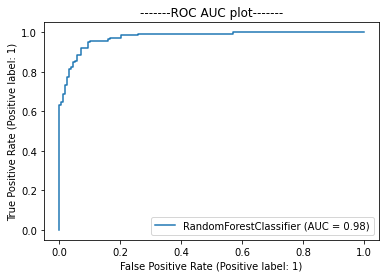

In [54]:
# ROC ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gcv_rfc.best_estimator_, x_test, y_test)
plt.title("-------ROC AUC plot-------")
plt.show()

### Pickling

In [55]:
# Pickling of the file or serialization of a file
# Random Forest Classifier
import joblib
joblib.dump(gcv_rfc.best_estimator_,"Insurance_RFC.pkl")

['Insurance_RFC.pkl']

In [56]:
insurance_model_rfc = joblib.load('Insurance_RFC.pkl')
insurance_result_rfc = insurance_model_rfc.score(x_test, y_test)
print(insurance_result_rfc*100)

92.22972972972973


In [57]:
insurance_conclusion = pd.DataFrame([insurance_model_rfc.predict(x_test),y_test], index=['Predicted Fraud report', 'Original Fraud report'])
insurance_conclusion.T

,Predicted Fraud report,Original Fraud report
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
291,0,0
292,1,1
293,0,0
294,0,0


In [58]:
insurance_conclusion.T[['Predicted Fraud report', 'Original Fraud report']].value_counts()

Predicted Fraud report  Original Fraud report
0                       0                        147
1                       1                        126
0                       1                         12
1                       0                         11
dtype: int64

###### We can see that model is predicting well 
###### Out of 296 test data model is predicting accurately on 147+126 = 273 occasions and wrong on 12+11 = 23 occasions

#### Thank You